Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#Types of model data tested on 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import time


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

Read the dataset

In [2]:
df = pd.read_csv("path name", sep = ';')

new_data = df.rename(columns =   {"DOY":"D",
                                  "Hour":"H",
                                  "Temperature_C_":"T", 
                                  "SolarRadiation0__W_m2_":"S_0",
                                  "SolarRadiation30__W_m2_":"S_30",
                                  "WindSpeed_m_s_":"W_s",
                                  "WindDirection_":"W_d",
                                  "Pressure_hPa_":"P_amb",
                                  "Precipitation_mm_":"P_pt",
                                  "CloudCover___":"C_c",
                                  "CloudType_H_M_L_":"C_t",
                                  "PoutDC":"P_out",
                                  "GHIClearSky":"GHI_cs",
                                  "DateNum":"DN",
                                  "GHImeas":"GHI_meas",
                                  "TAMBmeas":"T_amb"
                                  }) 
    
df.columns = ['D','H','T','S_0', 'S_30', 'W_s','W_d', 'P_amb', 'P_pt', 'C_c','C_t','P_out','GHI_cs','DN','GHI_meas','T_amb'] 

Box plot indicating data distribution through quartiles

In [3]:
df2 =  df.loc[:,['T','S_0', 'S_30','W_d', 'C_c','P_out','GHI_cs','GHI_meas','T_amb']]

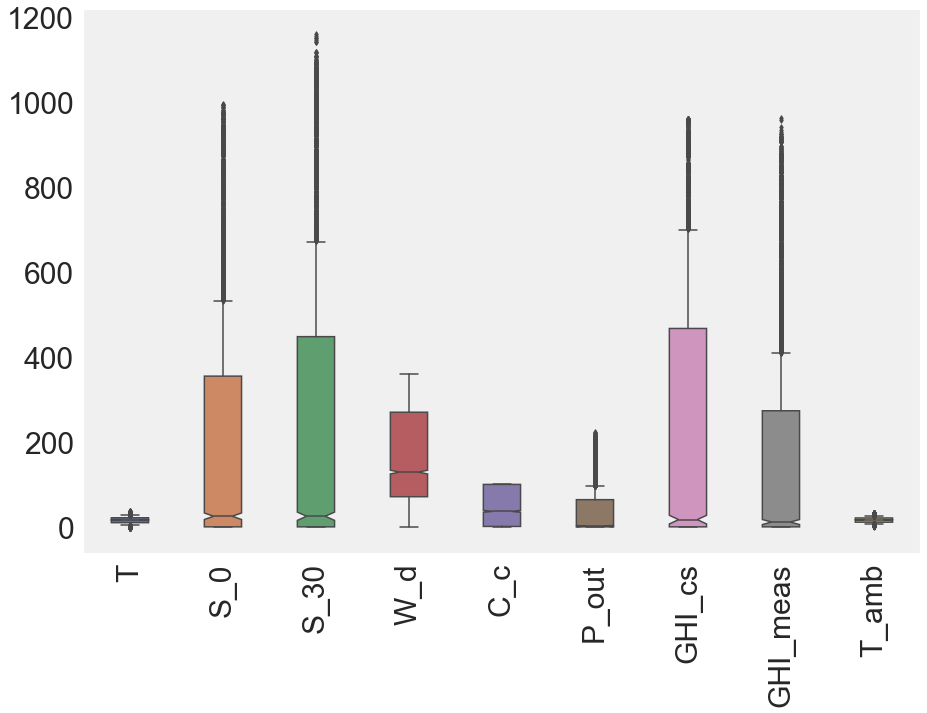

In [4]:
import seaborn as sns
sns.set(rc={"axes.facecolor":"#0F0F0F0F",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(15.0,10.0),
            'xtick.labelsize':30,
            'ytick.labelsize':30})
plt.xticks(rotation=90)
l = plt.xlabel('')
sns.boxplot(x=None, y=None, data=df2, width=0.4, dodge=True, fliersize=4, linewidth=None, whis=0.5,ax=None, notch=True)


Correlation of input features

In [5]:
df1 =  df.loc[:,['T','S_0', 'S_30', 'W_s','W_d', 'P_amb', 'P_pt', 'C_c','P_out','GHI_cs','GHI_meas','T_amb']]

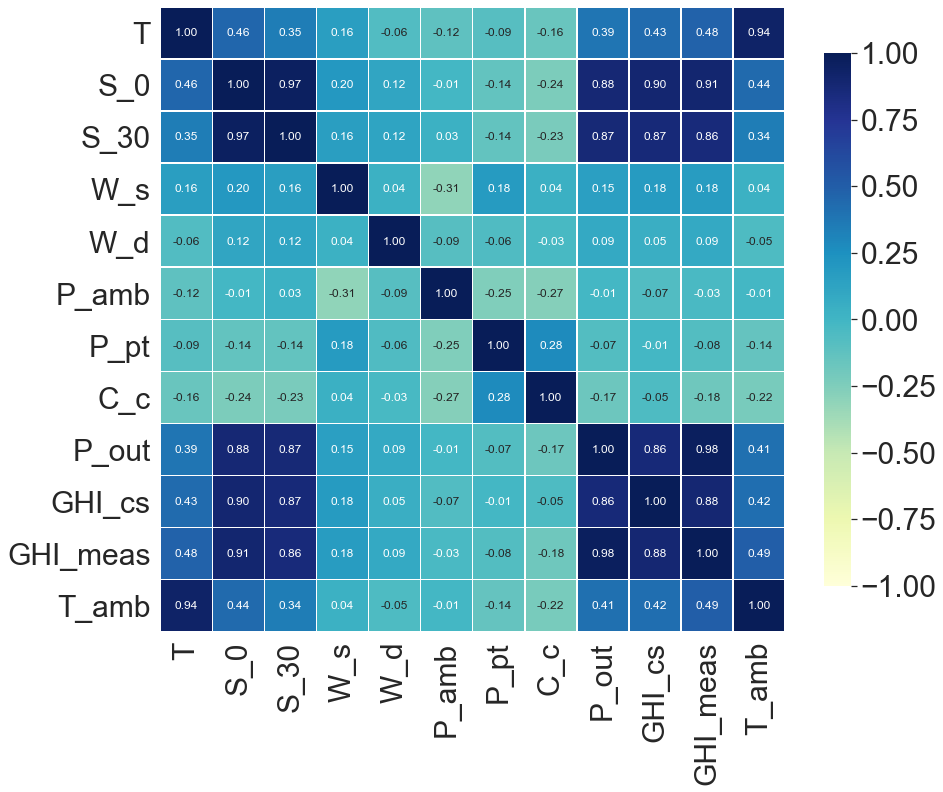

In [6]:
#Pearson's correlation
import seaborn as sns
def correlation_heatmap(df1):
    correlations = df1.corr(method='pearson')
    fig, ax = plt.subplots(figsize=(14,14))
    sns.heatmap(correlations,cmap='YlGnBu', vmin=-1, vmax=1, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df1)

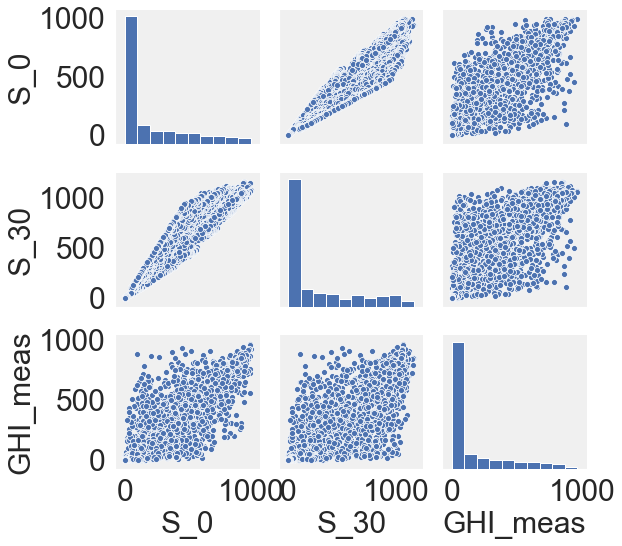

In [7]:
import seaborn as sns
import seaborn as sborn
sns.pairplot(df,vars=["S_0", "S_30","GHI_meas"])
sborn.set(font_scale=2)

Principle component analysis

In [8]:

X = df[['T','S_0','S_30','W_s','W_d','P_amb','P_pt','C_c','C_t','GHI_cs','GHI_meas','T_amb']]
Y = df['P_out']


pcamodel = PCA(n_components=12)

pca = pcamodel.fit_transform(X)
pca.shape

# PCA implementation
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)


In [10]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

In [11]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.4467604965771566
1.7166641777667289
1.4070943666258777
1.0985487457423104
0.9159731392534499
0.8479046106958164
0.6935799750839793
0.5682059378941842
0.13785236416643867
0.09866742543154523
0.050416982416205985
0.02064703977790523


In [13]:
tot = sum(eig_vals)
print("\n",tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("\n\n1.Variance Explained\n",var_exp)
cum_var_exp = np.cumsum(var_exp)
print("\n\n2.Cumulative Variance Explained\n",cum_var_exp)
print("\n\n3.Percentage of variance explained by first two principle components each contain\n",var_exp[0:2])
print("\n\n4.Percentage of variance explained by first two principle components together contain\n",sum(var_exp[0:2]))


 12.002315261431598


1.Variance Explained
 [37.04918925822951, 14.302775259395833, 11.723524469878356, 9.152806952775203, 7.63163705753381, 7.064508740413481, 5.778718188754286, 4.734136085560632, 1.1485481022933577, 0.8220699363613991, 0.4200604743171228, 0.1720254744870159]


2.Cumulative Variance Explained
 [ 37.04918926  51.35196452  63.07548899  72.22829594  79.859933
  86.92444174  92.70315993  97.43729601  98.58584411  99.40791405
  99.82797453 100.        ]


3.Percentage of variance explained by first two principle components each contain
 [37.04918925822951, 14.302775259395833]


4.Percentage of variance explained by first two principle components together contain
 51.35196451762535


Variance captured by each principle component

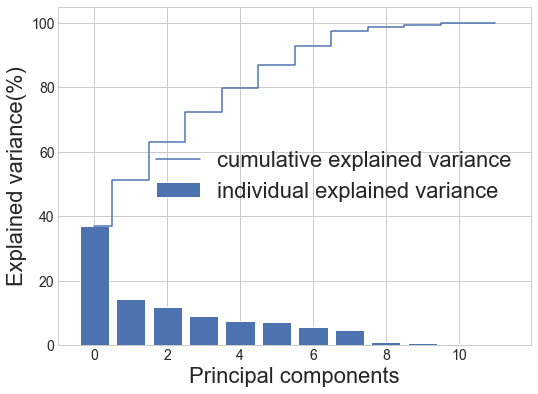

In [14]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(12), var_exp, alpha=1, align='center',
            label='individual explained variance')
    plt.step(range(12), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.tick_params(labelsize=14);
    plt.ylabel('Explained variance(%)',fontsize=22)
    plt.xlabel('Principal components',fontsize=22)
    plt.legend(loc='best')
    plt.tight_layout()

 Biplot representation of input features contributing variance on both PC1 and PC2 axis

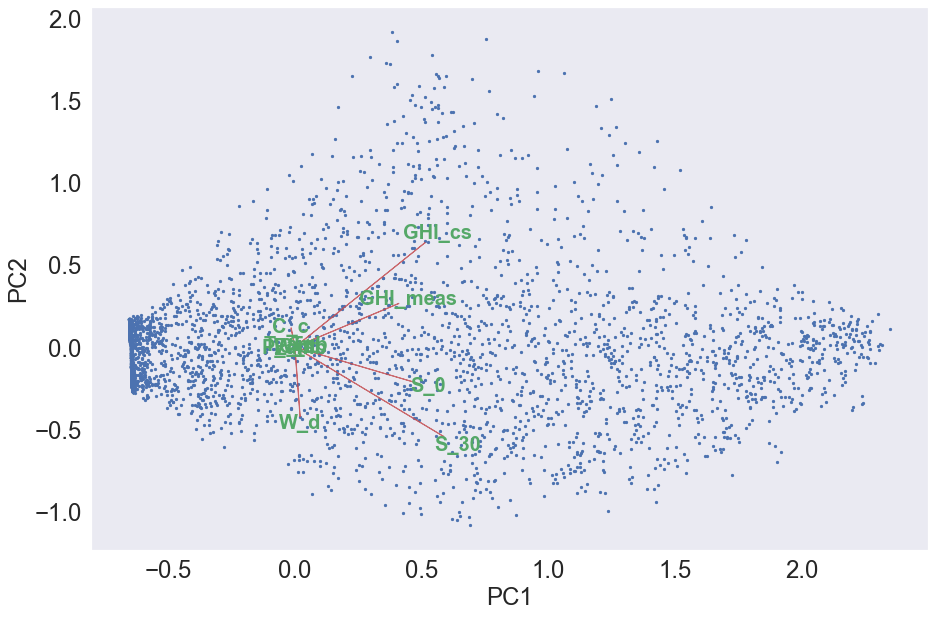

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 3/(xs.max() - xs.min())
    scaley = 3/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.8)
        if labels is None:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center',fontsize=20,fontweight='bold')
        else:
            plt.text(coeff[i,0]* 1.1, coeff[i,1] * 1.1, labels[i], color = 'g', ha = 'center', va = 'center',fontsize=20,fontweight='bold')
    #plt.xlim(-1,1)
    #plt.ylim(-1,1)      
    plt.xlabel("PC{}".format(1),fontsize=24)
    plt.ylabel("PC{}".format(2),fontsize=24)
    ax.tick_params(labelsize=24)
    plt.grid()


myplot(pca[:,0:2],np.transpose(pcamodel.components_[0:2, :]),list(X.columns))
plt.show()

Regression methods considering all the features

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
                
#new_dataset = df1.convert_objects(convert_numeric=True)
#print(new_dataset.dtypes)

# Standardization

scaler = MinMaxScaler()
scaler.fit(df)
scaler.transform(df)

X = df[['D','H','T','S_0', 'S_30', 'W_s','W_d', 'P_amb', 'P_pt', 'C_c','C_t','GHI_cs','DN']]
Y = df['P_out']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
C = 285

In [ ]:
# Linear regression
time1 = time.clock()
for i in range (100):
    # Train the network
    linear = LinearRegression()
    
    linear.fit(X_train, Y_train)
    
    # Test the model
    Y_predict = linear.predict(X_test)
time2 = time.clock()

print("testing time:",time2-time1,"ms") 


print('Normalized Mean Absolute Error:', (metrics.mean_absolute_error(Y_test, Y_predict)/C))
print('Normalized Root Mean Squared Error test:', (np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))/C))



In [ ]:
# Lasso Regression 
time1 = time.clock()
for i in range (100):
    # Train the network
    lasso = Lasso(alpha = 1.0)
    
    lasso.fit(X_train, Y_train)
    
    # Test the model
    Y_predict = lasso.predict(X_test)
time2 = time.clock()

print("testing time:",time2-time1,"ms") 

print('Normalized Mean Absolute Error:', (metrics.mean_absolute_error(Y_test, Y_predict)/C))
print('Normalized Root Mean Squared Error test:', (np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))/C))


In [ ]:
# Ridge regression
time1 = time.clock()
for i in range (100):
    # Train the network
    ridge = Ridge(alpha = 1.0)
    
    ridge.fit(X_train, Y_train)
    
    # Test the model
    Y_predict = ridge.predict(X_test)
time2 = time.clock()

print("testing time:",time2-time1,"ms") 

print('Normalized Mean Absolute Error:', (metrics.mean_absolute_error(Y_test, Y_predict)/C))
print('Normalized Root Mean Squared Error test:', (np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))/C))


In [ ]:
# MLP Multi layer perceptron
time1 = time.clock()
for i in range (100):
    # Train the network
    mlp = MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(100), random_state=0)

    mlp.fit(X_train, Y_train)
        
    # Test the model
    Y_predict = mlp.predict(X_test)
time2 = time.clock()

print("testing time:",time2-time1,"ms") 

print('Normalized Mean Absolute Error:', (metrics.mean_absolute_error(Y_test, Y_predict)/C))
print('Normalized Root Mean Squared Error test:', (np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))/C))

In [ ]:
#Support vector regression 
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler

#parameter selection

GridSearch = GridSearchCV(SVR(kernel='rbf'),param_grid={"C": [1e2,1e3,1e4],"gamma": [1e-5,1e-4,1e-3]}, scoring = 'explained_variance')
GridSearch.fit(X_train, Y_train)

best_parameters = GridSearch.best_params_
print ("The best value of parameters are:", GridSearch.best_params_, "The score of explained variance: ", GridSearch.best_score_)


time1 = time.clock()
for i in range (100):

    svr1 = SVR(kernel='rbf', C = best_parameters['C'], gamma = best_parameters['gamma'])
    
    svr1.fit(X_train, Y_train)    
    # Test the model
    Y_predict = svr1.predict(X_test)
time2 = time.clock()

print("testing time:",time2-time1,"ms") 

print('Normalized Mean Absolute Error:', (metrics.mean_absolute_error(Y_test, Y_predict)/C))
print('Normalized Root Mean Squared Error test:', (np.sqrt(metrics.mean_squared_error(Y_test, Y_predict))/C))

Regression methods considering the selected features

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
                
#new_dataset = df1.convert_objects(convert_numeric=True)
#print(new_dataset.dtypes)

# Standardization

scaler = MinMaxScaler()
scaler.fit(df)
scaler.transform(df)

X_SF = df[['S_0', 'S_30','GHI_cs']]
Y_SF = df['P_out']
X_train_SF, X_test_SF, Y_train_SF, Y_test_SF = train_test_split(X_SF, Y_SF, test_size=0.20, random_state=0)
C = 285

In [ ]:
# Linear regression
time1 = time.clock()
for i in range (100):
    # Train the network
    linear = LinearRegression()
    
    linear.fit(X_train_SF, Y_train_SF)
    
    # Test the model
    Y_predict_SF = linear.predict(X_test_SF)
time2 = time.clock()

print("testing time:",time2-time1,"ms") 


print('Normalized Mean Absolute Error:', (metrics.mean_absolute_error(Y_test_SF, Y_predict_SF)/C))
print('Normalized Root Mean Squared Error test:', (np.sqrt(metrics.mean_squared_error(Y_test_SF, Y_predict_SF))/C))

In [ ]:
# Lasso Regression 
time1 = time.clock()
for i in range (100):
    # Train the network
    lasso = Lasso(alpha = 1.0)
    
    lasso.fit(X_train_SF, Y_train_SF)
    
    # Test the model
    Y_predict = lasso.predict(X_test_SF)
time2 = time.clock()

print("testing time:",time2-time1,"ms") 

print('Normalized Mean Absolute Error:', (metrics.mean_absolute_error(Y_test_SF, Y_predict_SF)/C))
print('Normalized Root Mean Squared Error test:', (np.sqrt(metrics.mean_squared_error(Y_test_SF, Y_predict_SF))/C))


In [ ]:
# Ridge regression
time1 = time.clock()
for i in range (100):
    # Train the network
    ridge = Ridge(alpha = 1.0)
    
    ridge.fit(X_train_SF, Y_train_SF)
    
    # Test the model
    Y_predict = ridge.predict(X_test_SF)
time2 = time.clock()

print("testing time:",time2-time1,"ms") 

print('Normalized Mean Absolute Error:', (metrics.mean_absolute_error(Y_test_SF, Y_predict_SF)/C))
print('Normalized Root Mean Squared Error test:', (np.sqrt(metrics.mean_squared_error(Y_test_SF, Y_predict_SF))/C))


In [ ]:
# MLP Multi layer perceptron
time1 = time.clock()
for i in range (100):
    # Train the network
    mlp = MLPRegressor(activation='relu',solver='lbfgs', hidden_layer_sizes=(100), random_state=0)

    mlp.fit(X_train_SF, Y_train_SF)
        
    # Test the model
    Y_predict = mlp.predict(X_test_SF)
time2 = time.clock()

print("testing time:",time2-time1,"ms") 

print('Normalized Mean Absolute Error:', (metrics.mean_absolute_error(Y_test_SF, Y_predict_SF)/C))
print('Normalized Root Mean Squared Error test:', (np.sqrt(metrics.mean_squared_error(Y_test_SF, Y_predict_SF))/C))

In [ ]:
#Support vector regression 
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import StandardScaler

#parameter selection

GridSearch = GridSearchCV(SVR(kernel='rbf'),param_grid={"C": [1e2,1e3,1e4],"gamma": [1e-5,1e-4,1e-3]}, scoring = 'explained_variance')
GridSearch.fit(X_train_SF, Y_train_SF)

best_parameters = GridSearch.best_params_
print ("The best value of parameters are:", GridSearch.best_params_, "The score of explained variance: ", GridSearch.best_score_)


time1 = time.clock()
for i in range (100):

    svr1 = SVR(kernel='rbf', C = best_parameters['C'], gamma = best_parameters['gamma'])
    
    svr1.fit(X_train_SF, Y_train_SF)    
    # Test the model
    Y_predict = svr1.predict(X_test_SF)
time2 = time.clock()

print("testing time:",time2-time1,"ms") 

print('Normalized Mean Absolute Error:', (metrics.mean_absolute_error(Y_test_SF, Y_predict_SF)/C))
print('Normalized Root Mean Squared Error test:', (np.sqrt(metrics.mean_squared_error(Y_test_SF, Y_predict_SF))/C))